In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
import time, datetime
import re
from scipy.stats import boxcox
import pandas.plotting as pdplt

In [133]:
data=pd.read_csv('./Ordinal_Encoding.csv', index_col = 0)

In [134]:
data['class'].value_counts()

class
1    206774
0     93487
Name: count, dtype: int64

In [135]:
data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'departure_hour_sin', 'departure_hour_cos', 'arrival_hour_sin',
       'arrival_hour_cos', 'price_unskewed_boxcox', 'price_unskewed_sqrt',
       'price_unskewed'],
      dtype='object')

In [136]:
data.drop(['price_unskewed'], axis=1, inplace=True)

In [137]:
data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'departure_hour_sin', 'departure_hour_cos', 'arrival_hour_sin',
       'arrival_hour_cos', 'price_unskewed_boxcox', 'price_unskewed_sqrt'],
      dtype='object')

In [138]:
# economy data target will be price_unskewed_boxcox
# business data target will be price_unskewed_sqrt
economy_data = data[data['class'] == 1].drop(['class'], axis=1)
economy_data.drop(['price', 'price_unskewed_sqrt'], axis=1, inplace=True)
business_data = data[data['class'] == 0].drop(['class'], axis=1)
business_data.drop(['price', 'price_unskewed_boxcox'], axis=1, inplace=True)

In [139]:
economy_data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'duration', 'days_left', 'departure_hour_sin',
       'departure_hour_cos', 'arrival_hour_sin', 'arrival_hour_cos',
       'price_unskewed_boxcox'],
      dtype='object')

In [140]:
print(economy_data.shape)
print(business_data.shape)

(206774, 16)
(93487, 16)


In [141]:
economy_data.head()

,day_of_week,airline,source_city,departure_hour,departure_category,stops,arrival_hour,arrival_category,destination_city,duration,days_left,departure_hour_sin,departure_hour_cos,arrival_hour_sin,arrival_hour_cos,price_unskewed_boxcox
Unnamed: 0,,,,,,,,,,,,,,,,
0,4,4,2,18,2,0,21,4,5,130,1,-1.000000,-1.836970e-16,-7.071068e-01,7.071068e-01,3.560261
1,4,4,2,6,0,0,8,1,5,140,1,1.000000,6.123234e-17,8.660254e-01,-5.000000e-01,3.560261
2,4,1,2,4,0,0,6,0,5,130,1,0.866025,5.000000e-01,1.000000e+00,6.123234e-17,3.560320
3,4,7,2,10,1,0,12,3,5,135,1,0.500000,-8.660254e-01,1.224647e-16,-1.000000e+00,3.560300
4,4,7,2,8,1,0,11,1,5,140,1,0.866025,-5.000000e-01,2.588190e-01,-9.659258e-01,3.560300


In [143]:
# Preprocess X and y(target) values
X_economy = economy_data.drop(['price_unskewed_boxcox'], axis=1)
y_economy = economy_data['price_unskewed_boxcox']

X_business = business_data.drop(['price_unskewed_sqrt'], axis=1)
y_business = business_data['price_unskewed_sqrt']

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the economy data
X_train_economy, X_test_economy, y_train_economy, y_test_economy = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)

# Training the model for economy class
model_economy = LinearRegression()
model_economy.fit(X_train_economy, y_train_economy)

# Predicting and evaluating for economy class
predictions_economy = model_economy.predict(X_test_economy)
rmse_economy = np.sqrt(mean_squared_error(y_test_economy, predictions_economy))
print(f'Economy class RMSE: {rmse_economy}')


# Splitting the business data
X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(X_business, y_business, test_size=0.2, random_state=42)

# Training the model for business class
model_business = LinearRegression()
model_business.fit(X_train_business, y_train_business)

# Predicting and evaluating for business class
predictions_business = model_business.predict(X_test_business)
rmse_business = np.sqrt(mean_squared_error(y_test_business, predictions_business))
print(f'business class RMSE: {rmse_business}')

Economy class RMSE: 0.04455099194005672
business class RMSE: 20.815504913627706


In [145]:
from sklearn.metrics import mean_squared_error
import numpy as np

mean_price_economy = y_train_economy.mean()
predictions_baseline_economy = [mean_price_economy] * len(y_test_economy)
rmse_baseline_economy = np.sqrt(mean_squared_error(y_test_economy, predictions_baseline_economy))
print(f"Economy Baseline Model RMSE: {rmse_baseline_economy}")


mean_price_business = y_train_business.mean()
predictions_baseline_business = [mean_price_business] * len(y_test_business)
rmse_baseline_business = np.sqrt(mean_squared_error(y_test_business, predictions_baseline_business))
print(f"Business Baseline Model RMSE: {rmse_baseline_business}")


Economy Baseline Model RMSE: 0.06200759264364747
Business Baseline Model RMSE: 29.661108236508696


In [146]:
print(f"Economy Mean Price: {y_train_economy.mean()}, Std Dev of Price: {y_train_economy.std()}")
print(f"Business Mean Price: {y_train_business.mean()}, Std Dev of Price: {y_train_business.std()}")


Economy Mean Price: 3.5514096082494246, Std Dev of Price: 0.06214750327816776
Business Mean Price: 227.24679771260128, Std Dev of Price: 29.563337061282304


In [147]:
from sklearn.model_selection import cross_val_score

scores_economy = cross_val_score(model_economy, X_economy, y_economy, cv=5, scoring='neg_mean_squared_error')
rmse_scores_economy = np.sqrt(-scores_economy)
print(f"Cross-Validation RMSE: {rmse_scores_economy.mean()}")

scores_business = cross_val_score(model_business, X_business, y_business, cv=5, scoring='neg_mean_squared_error')
rmse_scores_business = np.sqrt(-scores_business)
print(f"Cross-Validation RMSE: {rmse_scores_business.mean()}")

Cross-Validation RMSE: 0.04552513042903589
Cross-Validation RMSE: 21.52201439083556


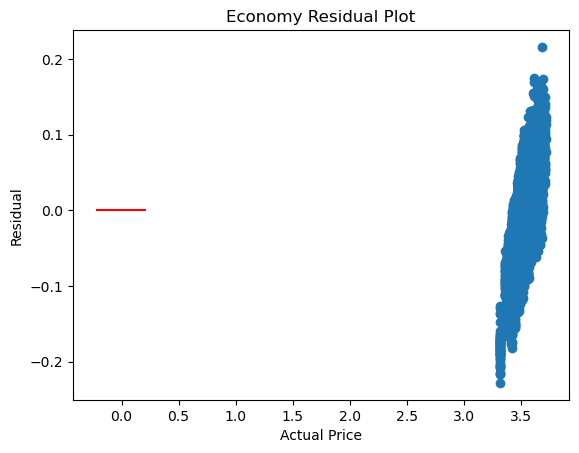

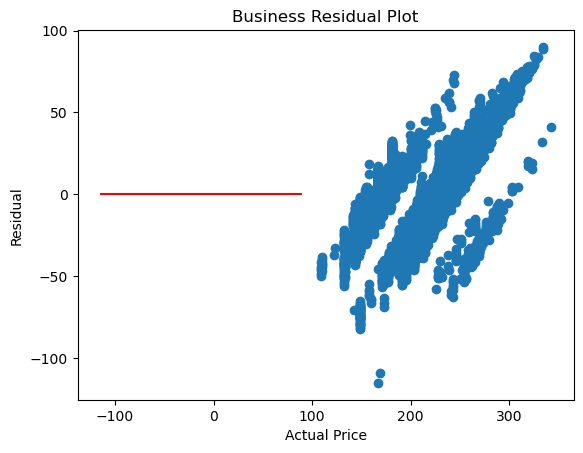

In [148]:
residuals_economy = y_test_economy - predictions_economy
plt.scatter(y_test_economy, residuals_economy)
plt.hlines(y=0, xmin=residuals_economy.min(), xmax=residuals_economy.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Economy Residual Plot')
plt.show()

residuals_business = y_test_business - predictions_business
plt.scatter(y_test_business, residuals_business)
plt.hlines(y=0, xmin=residuals_business.min(), xmax=residuals_business.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Business Residual Plot')
plt.show()


In [149]:
## What the above show so far using a simple Linear Regression Algorithm:
# This algorithm is not good for predicting high priced tickets.

In [150]:
import numpy as np

# Apply log transformation
y_train_economy_log = np.log(y_train_economy)
y_test_economy_log = np.log(y_test_economy)

# Retrain the model on the transformed target variable
model_economy_log = LinearRegression()
model_economy_log.fit(X_train_economy, y_train_economy_log)

# Predict on the test set and transform predictions back to the original scale
predictions_economy_log = model_economy_log.predict(X_test_economy)
predictions_economy_log = np.exp(predictions_economy_log)  # Inverse of log is exp

# Recalculate RMSE on the original scale of prices
rmse_economy_log = np.sqrt(mean_squared_error(y_test_economy, predictions_economy_log))
print(f"Economy class RMSE after log transformation: {rmse_economy_log}")


# Apply log transformation
y_train_business_log = np.log(y_train_business)
y_test_business_log = np.log(y_test_business)

# Retrain the model on the transformed target variable
model_business_log = LinearRegression()
model_business_log.fit(X_train_business, y_train_business_log)

# Predict on the test set and transform predictions back to the original scale
predictions_business_log = model_business_log.predict(X_test_business)
predictions_business_log = np.exp(predictions_business_log)  # Inverse of log is exp

# Recalculate RMSE on the original scale of prices
rmse_business_log = np.sqrt(mean_squared_error(y_test_business, predictions_business_log))
print(f"business class RMSE after log transformation: {rmse_business_log}")


Economy class RMSE after log transformation: 0.04454119999861669
business class RMSE after log transformation: 21.284822493030024


In [151]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

# Create a pipeline that applies log transformation to the target variable
regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log1p, inverse_func=np.expm1)

# Perform cross-validation
cv_scores = cross_val_score(regr_trans, X_train_economy, y_train_economy,
                            scoring='neg_mean_squared_error', cv=5)

# Calculate the RMSE from the cross-validation scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the average RMSE across all folds
print(f"Economy Average RMSE (log-transformed target) with 5-Fold CV: {cv_rmse_scores.mean()}")


# Create a pipeline that applies log transformation to the target variable
regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log1p, inverse_func=np.expm1)

# Perform cross-validation
cv_scores = cross_val_score(regr_trans, X_train_business, y_train_business,
                            scoring='neg_mean_squared_error', cv=5)

# Calculate the RMSE from the cross-validation scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the average RMSE across all folds
print(f"Business Average RMSE (log-transformed target) with 5-Fold CV: {cv_rmse_scores.mean()}")


Economy Average RMSE (log-transformed target) with 5-Fold CV: 0.0446483115603601
Business Average RMSE (log-transformed target) with 5-Fold CV: 21.32315446378048


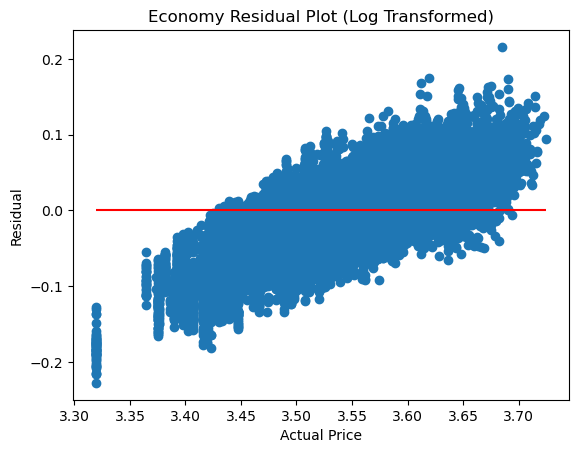

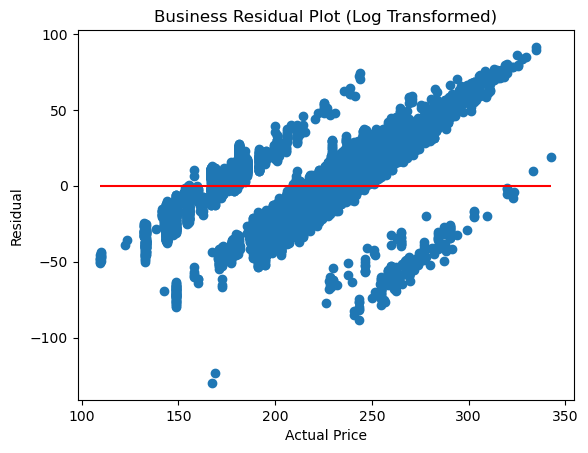

In [152]:
# Calculate residuals for the transformed predictions
residuals_economy_log = y_test_economy - predictions_economy_log

# Plot residuals for economy class
plt.scatter(y_test_economy, residuals_economy_log)
plt.hlines(y=0, xmin=y_test_economy.min(), xmax=y_test_economy.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Economy Residual Plot (Log Transformed)')
plt.show()

# Calculate residuals for the transformed predictions
residuals_business_log = y_test_business - predictions_business_log

# Plot residuals for business class
plt.scatter(y_test_business, residuals_business_log)
plt.hlines(y=0, xmin=y_test_business.min(), xmax=y_test_business.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Business Residual Plot (Log Transformed)')
plt.show()


RMSE for Random Forest: 0.01580193848206529


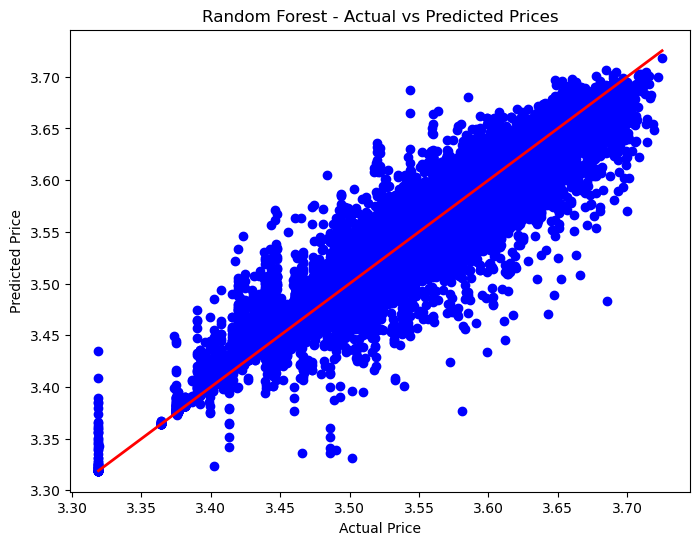

RMSE for Gradient Boost: 0.031769463198576764


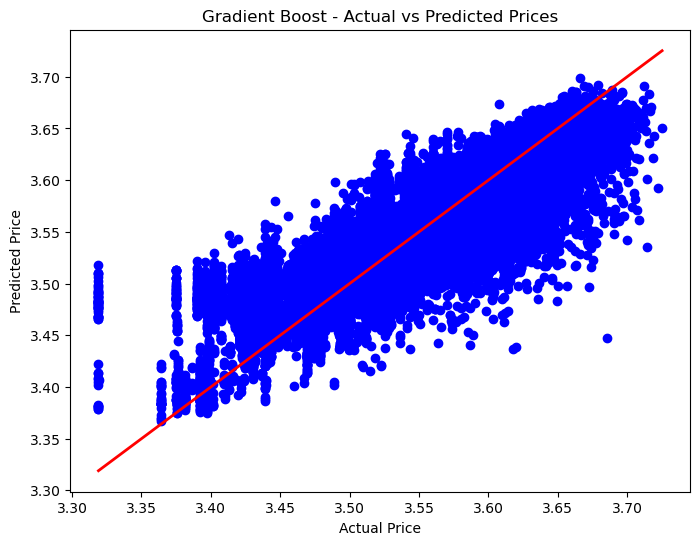

RMSE for XGBoost: 0.02297543203678715


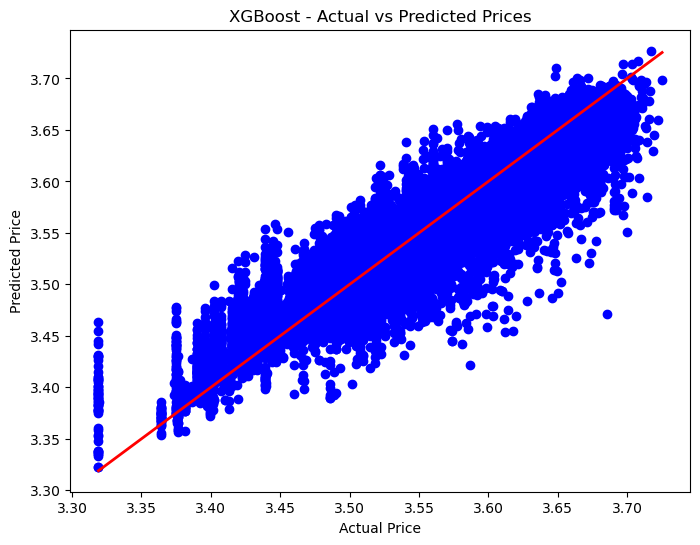

RMSE for Random Forest: 7.607513036630898


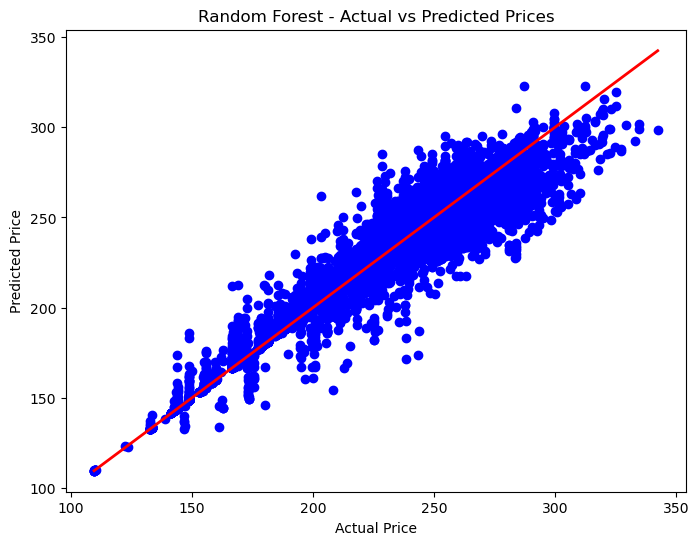

RMSE for Gradient Boost: 16.272109399411285


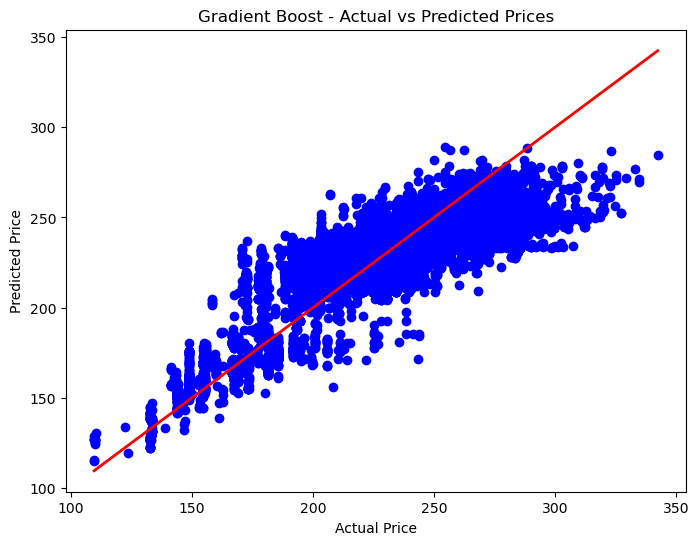

RMSE for XGBoost: 9.479841571049176


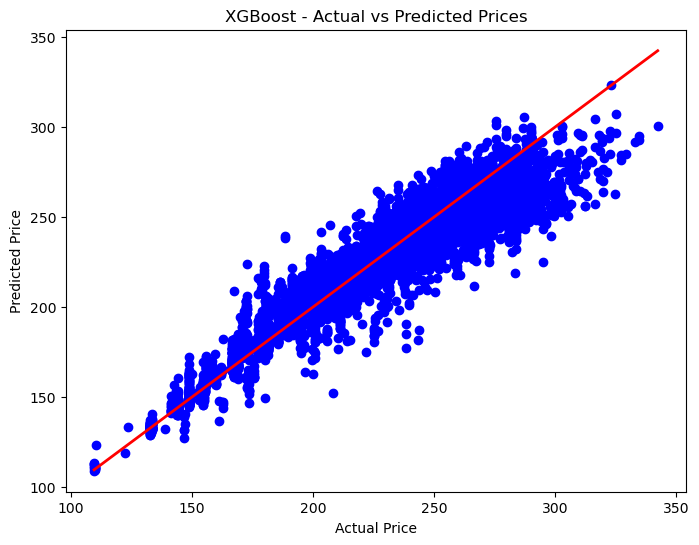

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to train regression models and visualize performance
def train_and_evaluate_models(X_train, X_test, y_train, y_test, model_name):
    if model_name == 'Random Forest':
        model = RandomForestRegressor()
    elif model_name == 'Gradient Boost':
        model = GradientBoostingRegressor()
    elif model_name == 'XGBoost':
        model = xgb.XGBRegressor()
    else:
        print("Invalid model name!")
        return
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE for {model_name}: {rmse}")
    
    # Visualize actual vs predicted prices
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f"{model_name} - Actual vs Predicted Prices")
    plt.show()

# Split the data into features and target variable for economy_data
# X_economy = economy_data.drop('price', axis=1)
# y_economy = economy_data['price']

# Split the data into training and testing sets for economy_data
X_train_economy, X_test_economy, y_train_economy, y_test_economy = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)

# Train and evaluate models for economy_data
for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models(X_train_economy, X_test_economy, y_train_economy, y_test_economy, model_name)

# Repeat the same process for business_data
# X_business = business_data.drop('price', axis=1)
# y_business = business_data['price']

X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(X_business, y_business, test_size=0.2, random_state=42)

for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models(X_train_business, X_test_business, y_train_business, y_test_business, model_name)


In [156]:
from sklearn.model_selection import cross_val_score

# Function to train regression models with cross-validation and visualize performance
def train_and_evaluate_models_cv(X, y, model_name):
    if model_name == 'Random Forest':
        model = RandomForestRegressor()
    elif model_name == 'Gradient Boost':
        model = GradientBoostingRegressor()
    elif model_name == 'XGBoost':
        model = xgb.XGBRegressor()
    else:
        print("Invalid model name!")
        return
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    
    # Convert scores to positive and calculate RMSE
    rmse_scores = np.sqrt(-cv_scores)
    print(f"Cross-Validation RMSE for {model_name}: {rmse_scores}")
    print(f"Average Cross-Validation RMSE for {model_name}: {np.mean(rmse_scores)}")

# Split the data into features and target variable for economy_data
# X_economy = economy_data.drop('price', axis=1)
# y_economy = economy_data['price']

# Split the data into training and testing sets for economy_data
# X_train_economy, X_test_economy, y_train_economy, y_test_economy = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)  
# Train and evaluate models with cross-validation for economy_data
for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models_cv(X_economy, y_economy, model_name)

    
# Repeat the same process for business_data
# X_business = business_data.drop('price', axis=1)
# y_business = business_data['price']

# X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(X_business, y_business, test_size=0.2, random_state=42)
# Repeat for business_data
for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models_cv(X_business, y_business, model_name)
    
########### Results #############
# Economy_data:
# Cross-Validation RMSE for Random Forest: [0.03986212 0.04082795 0.03742434 0.03705761 0.0412424 ]
# Average Cross-Validation RMSE for Random Forest: 0.03928288346492324
# Cross-Validation RMSE for Gradient Boost: [0.03442914 0.03581692 0.03256182 0.03242427 0.03913236]
# Average Cross-Validation RMSE for Gradient Boost: 0.03487290331438492
# Cross-Validation RMSE for XGBoost: [0.03618973 0.03865158 0.03431156 0.0294469  0.03803561]
# Average Cross-Validation RMSE for XGBoost: 0.03532707469252369
#
# Business_data:
# Cross-Validation RMSE for Random Forest: [26.1931891  16.93535957 21.23277161 21.82486505 19.17553451]
# Average Cross-Validation RMSE for Random Forest: 21.072343968959252
# Cross-Validation RMSE for Gradient Boost: [21.36303341 18.52072217 18.20704608 17.04569898 18.45781596]
# Average Cross-Validation RMSE for Gradient Boost: 18.71886331840388
# Cross-Validation RMSE for XGBoost: [23.37747796 19.66726816 18.40082972 18.2176615  17.13654142]
# Average Cross-Validation RMSE for XGBoost: 19.359955752286353


Cross-Validation RMSE for Random Forest: [0.03986212 0.04082795 0.03742434 0.03705761 0.0412424 ]
Average Cross-Validation RMSE for Random Forest: 0.03928288346492324
Cross-Validation RMSE for Gradient Boost: [0.03442914 0.03581692 0.03256182 0.03242427 0.03913236]
Average Cross-Validation RMSE for Gradient Boost: 0.03487290331438492
Cross-Validation RMSE for XGBoost: [0.03618973 0.03865158 0.03431156 0.0294469  0.03803561]
Average Cross-Validation RMSE for XGBoost: 0.03532707469252369
Cross-Validation RMSE for Random Forest: [26.1931891  16.93535957 21.23277161 21.82486505 19.17553451]
Average Cross-Validation RMSE for Random Forest: 21.072343968959252
Cross-Validation RMSE for Gradient Boost: [21.36303341 18.52072217 18.20704608 17.04569898 18.45781596]
Average Cross-Validation RMSE for Gradient Boost: 18.71886331840388
Cross-Validation RMSE for XGBoost: [23.37747796 19.66726816 18.40082972 18.2176615  17.13654142]
Average Cross-Validation RMSE for XGBoost: 19.359955752286353


In [162]:
# Length of datasets
len_economy_data = 206774
len_business_data = 93487

# Average cross-validation RMSE values
economy_data_rmse = {
    'Random Forest': 0.03928288346492324,
    'Gradient Boost': 0.03487290331438492,
    'XGBoost': 0.03532707469252369
}

business_data_rmse = {
    'Random Forest': 21.072343968959252,
    'Gradient Boost': 18.71886331840388,
    'XGBoost': 19.359955752286353
}

# Calculate percentage accuracy for each model and dataset
def calculate_accuracy(rmse, dataset_length):
    return (1.0 - (rmse / dataset_length)) * 100

print("Economy Data:")
for model, rmse in economy_data_rmse.items():
    accuracy = calculate_accuracy(rmse, len_economy_data)
    print(f"{model}: {accuracy:.2f}%")

print("\nBusiness Data:")
for model, rmse in business_data_rmse.items():
    accuracy = calculate_accuracy(rmse, len_business_data)
    print(f"{model}: {accuracy:.2f}%")


Economy Data:
Random Forest: 100.00%
Gradient Boost: 100.00%
XGBoost: 100.00%

Business Data:
Random Forest: 99.98%
Gradient Boost: 99.98%
XGBoost: 99.98%


In [164]:
# RMSE scores obtained from cross-validation
rmse_rf_economy = np.array([0.03986212, 0.04082795, 0.03742434, 0.03705761, 0.0412424])
rmse_gb_economy = np.array([0.03442914, 0.03581692, 0.03256182, 0.03242427, 0.03913236])
rmse_xgb_economy = np.array([0.03618973, 0.03865158, 0.03431156, 0.0294469,  0.03803561])

rmse_rf_business = np.array([26.1931891, 16.93535957, 21.23277161, 21.82486505, 19.17553451])
rmse_gb_business = np.array([21.36303341, 18.52072217, 18.20704608, 17.04569898, 18.45781596])
rmse_xgb_business = np.array([23.37747796, 19.66726816, 18.40082972, 18.2176615, 17.13654142])

# Mean price for economy_data and business_data
mean_price_economy = y_economy.mean()
mean_price_business = y_business.mean()
print(mean_price_economy)
# Calculate percentage accuracy for each model and dataset
percentage_accuracy_rf_economy = (1 - (np.mean(rmse_rf_economy) / mean_price_economy)) * 100
percentage_accuracy_gb_economy = (1 - (np.mean(rmse_gb_economy) / mean_price_economy)) * 100
percentage_accuracy_xgb_economy = (1 - (np.mean(rmse_xgb_economy) / mean_price_economy)) * 100

percentage_accuracy_rf_business = (1 - (np.mean(rmse_rf_business) / mean_price_business)) * 100
percentage_accuracy_gb_business = (1 - (np.mean(rmse_gb_business) / mean_price_business)) * 100
percentage_accuracy_xgb_business = (1 - (np.mean(rmse_xgb_business) / mean_price_business)) * 100

# Print results
print("Percentage Accuracy for Economy Data:")
print(f"Random Forest: {percentage_accuracy_rf_economy:.2f}%")
print(f"Gradient Boost: {percentage_accuracy_gb_economy:.2f}%")
print(f"XGBoost: {percentage_accuracy_xgb_economy:.2f}%")

print("\nPercentage Accuracy for Business Data:")
print(f"Random Forest: {percentage_accuracy_rf_business:.2f}%")
print(f"Gradient Boost: {percentage_accuracy_gb_business:.2f}%")
print(f"XGBoost: {percentage_accuracy_xgb_business:.2f}%")


3.551431345965862
Percentage Accuracy for Economy Data:
Random Forest: 98.89%
Gradient Boost: 99.02%
XGBoost: 99.01%

Percentage Accuracy for Business Data:
Random Forest: 90.73%
Gradient Boost: 91.76%
XGBoost: 91.48%


In [165]:
# RMSE scores obtained from cross-validation
rmse_rf_economy = np.array([0.03986212, 0.04082795, 0.03742434, 0.03705761, 0.0412424])
rmse_gb_economy = np.array([0.03442914, 0.03581692, 0.03256182, 0.03242427, 0.03913236])
rmse_xgb_economy = np.array([0.03618973, 0.03865158, 0.03431156, 0.0294469,  0.03803561])

rmse_rf_business = np.array([26.1931891, 16.93535957, 21.23277161, 21.82486505, 19.17553451])
rmse_gb_business = np.array([21.36303341, 18.52072217, 18.20704608, 17.04569898, 18.45781596])
rmse_xgb_business = np.array([23.37747796, 19.66726816, 18.40082972, 18.2176615, 17.13654142])

# Number of samples in the test set
n_samples_economy = len(y_test_economy)
n_samples_business = len(y_test_business)

# Calculate percentage accuracy for each model and dataset
percentage_accuracy_rf_economy = (1 - (np.mean(rmse_rf_economy) / n_samples_economy)) * 100
percentage_accuracy_gb_economy = (1 - (np.mean(rmse_gb_economy) / n_samples_economy)) * 100
percentage_accuracy_xgb_economy = (1 - (np.mean(rmse_xgb_economy) / n_samples_economy)) * 100

percentage_accuracy_rf_business = (1 - (np.mean(rmse_rf_business) / n_samples_business)) * 100
percentage_accuracy_gb_business = (1 - (np.mean(rmse_gb_business) / n_samples_business)) * 100
percentage_accuracy_xgb_business = (1 - (np.mean(rmse_xgb_business) / n_samples_business)) * 100

# Print results
print("Percentage Accuracy for Economy Data:")
print(f"Random Forest: {percentage_accuracy_rf_economy:.2f}%")
print(f"Gradient Boost: {percentage_accuracy_gb_economy:.2f}%")
print(f"XGBoost: {percentage_accuracy_xgb_economy:.2f}%")

print("\nPercentage Accuracy for Business Data:")
print(f"Random Forest: {percentage_accuracy_rf_business:.2f}%")
print(f"Gradient Boost: {percentage_accuracy_gb_business:.2f}%")
print(f"XGBoost: {percentage_accuracy_xgb_business:.2f}%")


Percentage Accuracy for Economy Data:
Random Forest: 100.00%
Gradient Boost: 100.00%
XGBoost: 100.00%

Percentage Accuracy for Business Data:
Random Forest: 99.89%
Gradient Boost: 99.90%
XGBoost: 99.90%


In [170]:
for i, column in enumerate(economy_data.drop('price_unskewed_boxcox', axis=1).columns):
    print(f"Column {i}: {column}")

Column 0: day_of_week
Column 1: airline
Column 2: source_city
Column 3: departure_hour
Column 4: departure_category
Column 5: stops
Column 6: arrival_hour
Column 7: arrival_category
Column 8: destination_city
Column 9: duration
Column 10: days_left
Column 11: departure_hour_sin
Column 12: departure_hour_cos
Column 13: arrival_hour_sin
Column 14: arrival_hour_cos


Feature ranking:
1. feature 10 (0.490843)
2. feature 9 (0.265065)
3. feature 1 (0.171059)
4. feature 2 (0.023031)
5. feature 8 (0.017216)
6. feature 5 (0.012573)
7. feature 6 (0.007019)
8. feature 13 (0.003762)
9. feature 3 (0.003159)
10. feature 12 (0.002902)
11. feature 0 (0.002283)
12. feature 11 (0.000523)
13. feature 14 (0.000295)
14. feature 7 (0.000264)
15. feature 4 (0.000006)


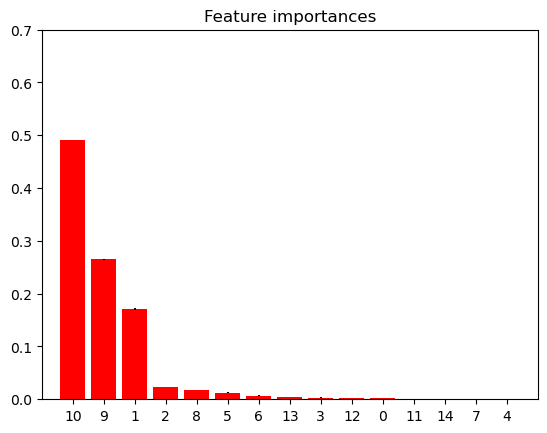

In [179]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import KFold

# Define the number of folds
n_splits = 5  # You can adjust this value as needed

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

estimator = GradientBoostingRegressor(n_estimators=100, random_state=42)
# Perform cross-validation to compute feature importances
cv_scores = cross_val_score(estimator, X_economy, y_economy, cv=kf, scoring='neg_mean_squared_error')

# Fit the estimator to get feature importances for each fold
importances_list = []
for train_index, test_index in kf.split(X_economy):
    X_train, X_test = X_economy.iloc[train_index], X_economy.iloc[test_index]
    y_train, y_test = y_economy.iloc[train_index], y_economy.iloc[test_index]
    estimator.fit(X_train, y_train)
    importances_list.append(estimator.feature_importances_)

# Compute average feature importances across folds
avg_importances = np.mean(importances_list, axis=0)
std_importances = np.std(importances_list, axis=0)
indices = np.argsort(avg_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_economy.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], avg_importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_economy.shape[1]), avg_importances[indices], color="r", yerr=std_importances[indices], align="center")
plt.xticks(range(X_economy.shape[1]), indices)
plt.xlim([-1, X_economy.shape[1]])
plt.ylim([0, 0.7])
plt.show()


In [177]:
# Assuming 'data' is your DataFrame
for i, column in enumerate(X_business.columns):
    print(f"Column {i}: {column}")

Column 0: day_of_week
Column 1: airline
Column 2: source_city
Column 3: departure_hour
Column 4: departure_category
Column 5: stops
Column 6: arrival_hour
Column 7: arrival_category
Column 8: destination_city
Column 9: duration
Column 10: days_left
Column 11: departure_hour_sin
Column 12: departure_hour_cos
Column 13: arrival_hour_sin
Column 14: arrival_hour_cos


Feature ranking:
1. feature 9 (0.674762)
2. feature 1 (0.118949)
3. feature 8 (0.058980)
4. feature 2 (0.052897)
5. feature 10 (0.028938)
6. feature 5 (0.013425)
7. feature 3 (0.012592)
8. feature 11 (0.011614)
9. feature 12 (0.008455)
10. feature 7 (0.005886)
11. feature 14 (0.005806)
12. feature 6 (0.003408)
13. feature 13 (0.003012)
14. feature 4 (0.001199)
15. feature 0 (0.000078)


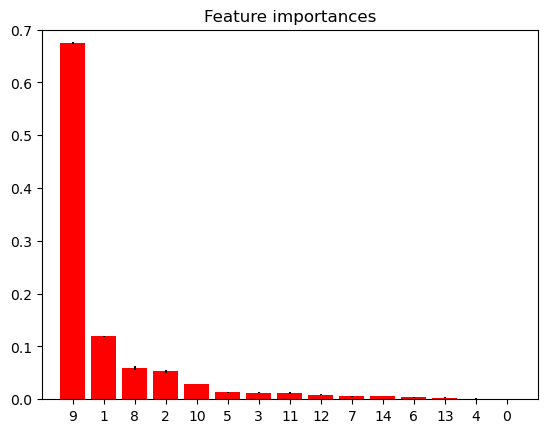

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import KFold

# Define the number of folds
n_splits = 5  # You can adjust this value as needed

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

estimator = GradientBoostingRegressor(n_estimators=100, random_state=42)
# Perform cross-validation to compute feature importances
cv_scores = cross_val_score(estimator, X_business, y_business, cv=kf, scoring='neg_mean_squared_error')

# Fit the estimator to get feature importances for each fold
importances_list = []
for train_index, test_index in kf.split(X_business):
    X_train, X_test = X_business.iloc[train_index], X_business.iloc[test_index]
    y_train, y_test = y_business.iloc[train_index], y_business.iloc[test_index]
    estimator.fit(X_train, y_train)
    importances_list.append(estimator.feature_importances_)

# Compute average feature importances across folds
avg_importances = np.mean(importances_list, axis=0)
std_importances = np.std(importances_list, axis=0)
indices = np.argsort(avg_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_business.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], avg_importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_business.shape[1]), avg_importances[indices], color="r", yerr=std_importances[indices], align="center")
plt.xticks(range(X_business.shape[1]), indices)
plt.xlim([-1, X_business.shape[1]])
plt.ylim([0, 0.7])
plt.show()